# Problem Statement

In Level 2 of the Cognifyz Data Science Internship, the objective is to further enrich and refine our understanding of the restaurant dataset through three distinct tasks:

# Task 1: Table Booking and Online Delivery

- Calculate the percentage of restaurants offering table booking and online delivery services.
- Compare the average ratings of restaurants with and without table booking.
- Analyze the availability of online delivery options across various price ranges.

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv('Dataset .csv')
df.head()


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


### Percentage of Table Booking and Online Delivery

In [3]:
total_restaurants = len(df)

table_booking_percentage = (df['Has Table booking'] == 'Yes').sum() / total_restaurants * 100
online_delivery_percentage = (df['Has Online delivery'] == 'Yes').sum() / total_restaurants * 100

print(f"Percentage of restaurants offering Table Booking: {table_booking_percentage:.2f}%")
print(f"Percentage of restaurants offering Online Delivery: {online_delivery_percentage:.2f}%")


Percentage of restaurants offering Table Booking: 12.12%
Percentage of restaurants offering Online Delivery: 25.66%


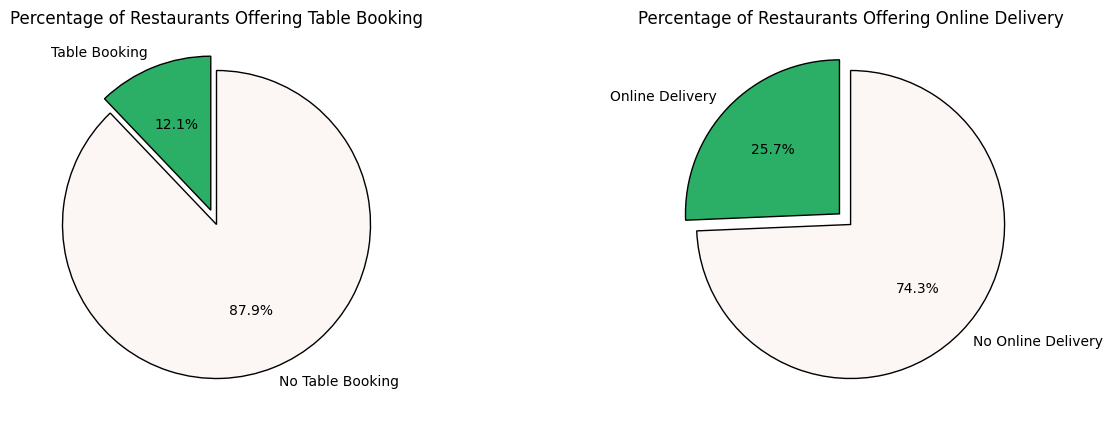

In [4]:
colors = ['#2BAE66','#FCF6F5']
table_booking_percentage = 12.12
online_delivery_percentage = 25.66

fig = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
plt.subplot(1,2,1)

percentages = [table_booking_percentage, 100 - table_booking_percentage]  
labels = ['Table Booking', 'No Table Booking']

plt.pie(percentages, labels=labels, autopct='%1.1f%%', startangle=90, explode=(0.1, 0),colors=colors,
        wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})

plt.title('Percentage of Restaurants Offering Table Booking')

plt.subplot(1,2,2)
percentages1 = [online_delivery_percentage, 100 - online_delivery_percentage]  
labels1 = ['Online Delivery', 'No Online Delivery']


plt.pie(percentages1, labels=labels1, autopct='%1.1f%%', startangle=90, explode=(0.1, 0),colors=colors,
        wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})

plt.title('Percentage of Restaurants Offering Online Delivery')



plt.show()



### Average Ratings Of Restaurants with and without Table Booking

Average rating with Table Booking: 3.44
Average rating without Table Booking: 2.56


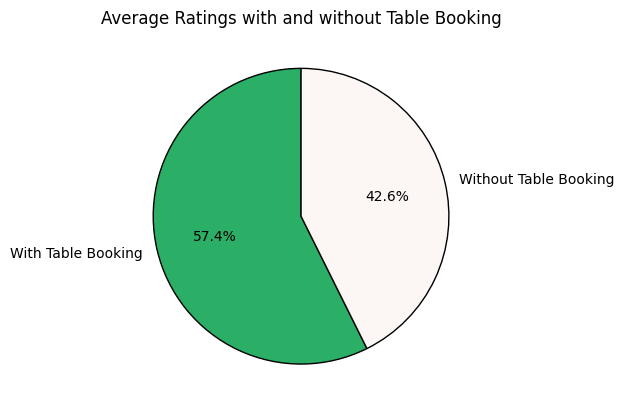

In [5]:
avg_rating_with_table = df[df['Has Table booking'] == 'Yes']['Aggregate rating'].mean()
avg_rating_without_table = df[df['Has Table booking'] == 'No']['Aggregate rating'].mean()

print(f"Average rating with Table Booking: {avg_rating_with_table:.2f}")
print(f"Average rating without Table Booking: {avg_rating_without_table:.2f}")

average_ratings = [avg_rating_with_table, avg_rating_without_table]
labels = ['With Table Booking', 'Without Table Booking']

plt.pie(average_ratings, labels=labels, autopct='%1.1f%%', startangle=90,colors=colors,
        wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})

plt.title('Average Ratings with and without Table Booking')
plt.show()

### Availability of Online Delivery

In [6]:
#Availability of online delivery with different price ranges

price_ranges = df['Average Cost for two'].apply(lambda x: 'Low' if x < 500 else 'Medium' if 500 <= x <= 1000 else 'High')
online_delivery_by_price_range = df.groupby(price_ranges)['Has Online delivery'].value_counts(normalize=True).unstack()

print("Online Delivery Availability by Price Range:")
print(online_delivery_by_price_range)

Online Delivery Availability by Price Range:
Has Online delivery         No       Yes
Average Cost for two                    
High                  0.719149  0.280851
Low                   0.858523  0.141477
Medium                0.566209  0.433791


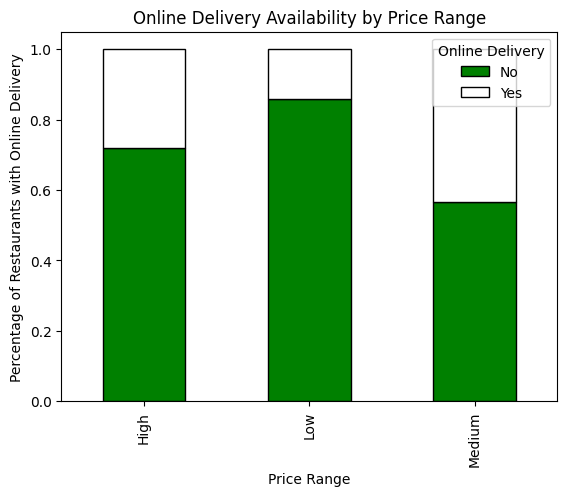

In [7]:
online_delivery_by_price_range.plot(kind='bar', stacked=True, color=['green', 'white'], edgecolor='black')

plt.title('Online Delivery Availability by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Percentage of Restaurants with Online Delivery')
plt.legend(title='Online Delivery')

plt.show()


### Insights from Task 1
- Percentage of restaurants offering Table Booking 12.12% and Online Delivery 25.66%
- Average rating with Table Booking 3.44 and without Table Booking: 2.56
- Online delivery availability for medium price range food product is better compare to high and low price range food product

# Task 2: Price Range Analysis

- Determine the most common price range among all restaurants.
- Calculate the average rating for each price range.
- Identify the color associated with the highest average rating, simplifying the identification of top-rated price ranges.

### Most Common Price Range

In [8]:
most_common_price_range = df['Price range'].mode()[0]
print(f"Most Common Price Range: {most_common_price_range}")

Most Common Price Range: 1


### Average Rating for Each Price Range

In [9]:
avg_rating_by_price_range = df.groupby('Price range')['Aggregate rating'].mean()

print("Average rating for each price range:")
print(round(avg_rating_by_price_range,3))

Average rating for each price range:
Price range
1    2.000
2    2.941
3    3.683
4    3.818
Name: Aggregate rating, dtype: float64


### Highest Average Rating Among Different Price Ranges

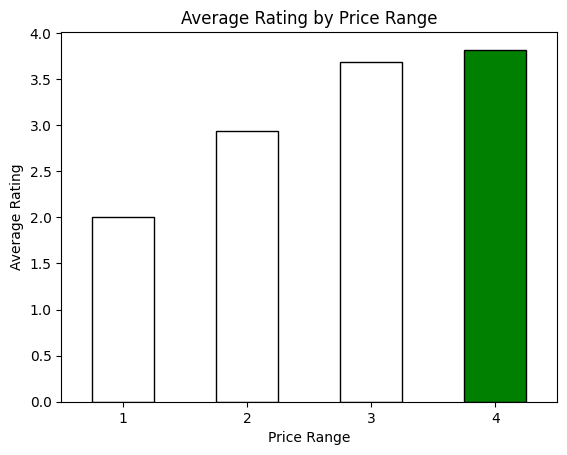

Highest Average Rating Price Range: 4


In [10]:
avg_rating_by_price_range = df.groupby('Price range')['Aggregate rating'].mean()
highest_avg_rating_range = avg_rating_by_price_range.idxmax()

colors = ['green' if range == highest_avg_rating_range else 'white' for range in avg_rating_by_price_range.index]

avg_rating_by_price_range.plot(kind='bar', color=colors, edgecolor='black')

plt.title('Average Rating by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Average Rating')
plt.xticks(rotation=0)

plt.show()

print(f"Highest Average Rating Price Range: {highest_avg_rating_range}")


### Insights from Task 2
- Most common price range among all the restaurants is 1
- Price range 4 get the highest average rating, which is 3.818. Followed by price range 3, 2 and 1

# Task 3: Feature Engineering

- Leverage advanced feature engineering techniques to extract additional insights from existing columns.
- Create new features, such as "Has Table Booking" and "Has Online Delivery," by encoding categorical variables, enhancing the dataset's intelligence.

### Extract Additional Features



In [11]:
# Extracting additional features from the existing columns, such as the length of the restaurant name or address

df['Restaurant Name Length'] = df['Restaurant Name'].apply(len)

df['Address Length'] = df['Address'].apply(len)

df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Restaurant Name Length,Address Length
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,No,No,No,3,4.8,Dark Green,Excellent,314,16,71
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,No,No,No,3,4.5,Dark Green,Excellent,591,16,67
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,No,No,No,4,4.4,Green,Very Good,270,22,56
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,4,4.9,Dark Green,Excellent,365,4,70
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,No,No,No,4,4.8,Dark Green,Excellent,229,11,64


In [12]:
#calculating cost per vote
df['Cost per Vote'] = df['Average Cost for two'] / df['Votes']
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Restaurant Name Length,Address Length,Cost per Vote
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,No,No,3,4.8,Dark Green,Excellent,314,16,71,3.503185
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,No,No,3,4.5,Dark Green,Excellent,591,16,67,2.030457
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,No,No,4,4.4,Green,Very Good,270,22,56,14.814815
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,4,4.9,Dark Green,Excellent,365,4,70,4.109589
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,No,No,4,4.8,Dark Green,Excellent,229,11,64,6.550218


### Create New Features

In [13]:
df['Has Table Booking'] = np.where(df['Has Table booking'] == 'Yes', 1, 0)
df['Has Online Delivery'] = np.where(df['Has Online delivery'] == 'Yes', 1, 0)

# Droping the original categorical columns 
df = df.drop(['Has Table booking', 'Has Online delivery'], axis=1)

df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Price range,Aggregate rating,Rating color,Rating text,Votes,Restaurant Name Length,Address Length,Cost per Vote,Has Table Booking,Has Online Delivery
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,3,4.8,Dark Green,Excellent,314,16,71,3.503185,1,0
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,3,4.5,Dark Green,Excellent,591,16,67,2.030457,1,0
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,4,4.4,Green,Very Good,270,22,56,14.814815,1,0
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,4,4.9,Dark Green,Excellent,365,4,70,4.109589,0,0
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,4,4.8,Dark Green,Excellent,229,11,64,6.550218,1,0


In [14]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Is delivering now',
       'Switch to order menu', 'Price range', 'Aggregate rating',
       'Rating color', 'Rating text', 'Votes', 'Restaurant Name Length',
       'Address Length', 'Cost per Vote', 'Has Table Booking',
       'Has Online Delivery'],
      dtype='object')

### Insights from Task 3
- Two new columns added, 'Restaurant Name length' and 'Address Length' from the length of the restaurant name or address.
- one more column added of calculating cost per vote
- Also two new binary column added by encoding categorical variables, 'Has Table booking' and 'Has Online delivery'
- Dropping old columns of without encoding

# Conclusion

The insights which i found from the overall level 2 project:

## Table Booking and Online Delivery:

- Approximately 12.12% of restaurants offer table booking, while 25.66% provide online delivery services.
- Restaurants with table booking have a significantly higher average rating of 3.44, compared to 2.56 for those without this service.
- Online delivery is more prevalent in restaurants with medium-priced food products.

## Price Range Analysis:

The most common price range among restaurants is 1.
Restaurants in price range 4 achieve the highest average rating at 3.818, followed by price ranges 3, 2, and 1.

## Feature Engineering:

- Introduced three new columns, 'Restaurant Name Length' , 'Address Length,' and 'Cost per vote' based on the length of restaurant names and addresses.
- Additionally, i created two binary columns, 'Has Table Booking' and 'Has Online Delivery,' by encoding categorical variables.
- These findings provide valuable insights into the relationships between services, price ranges, and ratings in the restaurant dataset, enhancing our understanding of the industry.